# Segmentation Dataset

Importujemy biblioteki

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Wczytujemy plik z metadatą

In [2]:
metadata = pd.read_csv("Test-Images-Clinical-Details.csv")

In [3]:
metadata

,SIRM Case,Slice position in .nii.gz,Patient age,Patient Sex (Male = 0 Female = 1),Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,60.0,80.0,0.0,NaN,NaN,NaN
1,2,2.0,62.0,0.0,NaN,NaN,NaN
2,2,89.0,NaN,NaN,NaN,NaN,NaN
3,3,72.0,57.0,0.0,NaN,NaN,NaN
4,3,70.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Widzimy, że ostatnie trzy kolumny są nullowe, zobaczmy czy jest tak dla wszystkich wierszy

In [4]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SIRM Case                          101 non-null    object 
 1   Slice position in .nii.gz          101 non-null    float64
 2   Patient age                        41 non-null     float64
 3   Patient Sex (Male = 0 Female = 1)  39 non-null     float64
 4   Unnamed: 4                         1 non-null      float64
 5   Unnamed: 5                         1 non-null      float64
 6   Unnamed: 6                         1 non-null      float64
dtypes: float64(6), object(1)
memory usage: 5.9+ KB


Możemy zatem usunąć te kolumny.

In [5]:
metadata= metadata.drop(columns=["Unnamed: 4","Unnamed: 5","Unnamed: 6"])

Dodatkowo, usuwany puste wiersze.

In [6]:
metadata = metadata.iloc[:-6]

In [7]:
metadata.describe()

,Slice position in .nii.gz,Patient age,Patient Sex (Male = 0 Female = 1)
count,100.000000,40.00000,38.000000
mean,49.500000,63.32500,0.289474
std,29.011492,14.30687,0.459606
min,0.000000,27.00000,0.000000
25%,24.750000,55.00000,0.000000
50%,49.500000,63.50000,0.000000
75%,74.250000,73.00000,1.000000
max,99.000000,87.00000,1.000000


In [8]:
metadata

,SIRM Case,Slice position in .nii.gz,Patient age,Patient Sex (Male = 0 Female = 1)
0,1,60.0,80.0,0.0
1,2,2.0,62.0,0.0
2,2,89.0,NaN,NaN
3,3,72.0,57.0,0.0
4,3,70.0,NaN,NaN
...,...,...,...,...
95,47,69.0,61.0,0.0
96,47,96.0,NaN,NaN
97,47,51.0,NaN,NaN
98,49,1.0,84.0,0.0


In [9]:
len(metadata["SIRM Case"].unique())

43

Widzimy, że mamy 43 różnych przypadków SIRM

Teraz zobaczmy jaki jest wiek naszych pacjentów

In [10]:
metadata["Patient age"].value_counts()

61.0    3
80.0    2
72.0    2
64.0    2
62.0    2
43.0    2
73.0    2
55.0    2
86.0    1
63.0    1
47.0    1
76.0    1
53.0    1
48.0    1
87.0    1
82.0    1
65.0    1
79.0    1
68.0    1
27.0    1
58.0    1
78.0    1
69.0    1
71.0    1
50.0    1
60.0    1
67.0    1
32.0    1
45.0    1
57.0    1
84.0    1
Name: Patient age, dtype: int64

In [11]:
metadata["Patient age"].dropna().mean()

63.325

Widzimy, że średnia wieku grupy badawczej wynosi około 63 lata

Zobaczmy jaki jest podział naszych pacjentów według płci.

In [12]:
metadata["Patient Sex (Male = 0 Female = 1)"].value_counts()

0.0    27
1.0    11
Name: Patient Sex (Male = 0 Female = 1), dtype: int64

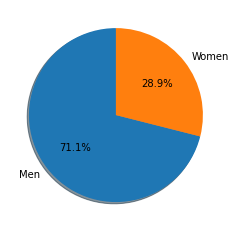

In [13]:
values = [27,11]
labels = ["Men","Women"]
plt.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

# Zobaczmy przykładowe zdjęcie

In [14]:
import nibabel as nib

In [15]:
from nilearn import plotting

In [16]:
img = nib.load('tr_im.nii')
trim = img.get_data()
trim_data = img.get_fdata()

In [17]:
trim_data.shape

(512, 512, 100)

Mężczyzna 62lata

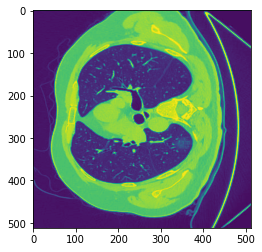

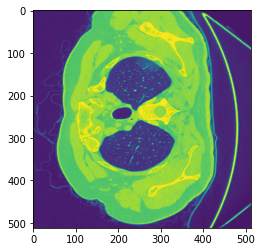

In [18]:
test1 = trim_data[:,:,2]
plt.imshow(test1)
plt.show()
test2 = trim_data[:,:,89]
plt.imshow(test2)
plt.show()


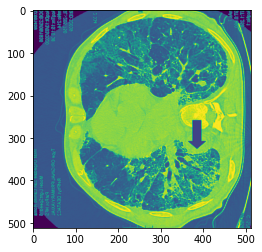

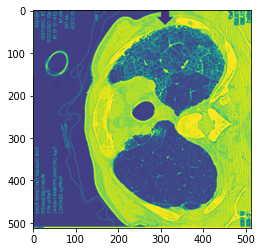

In [19]:
test1 = trim_data[:,:,1]
plt.imshow(test1)
plt.show()
test2 = trim_data[:,:,15]
plt.imshow(test2)
plt.show()

# Maska

In [20]:
img2 = nib.load('tr_mask.nii')
trim2 = img.get_data()
trim_data2 = img2.get_fdata()
trim_data2.shape

(512, 512, 100)

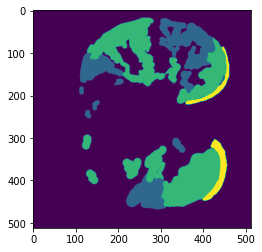

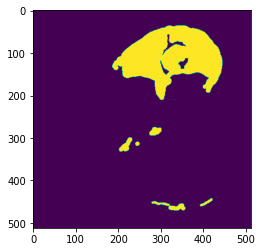

In [21]:
test1 = trim_data2[:,:,1]
plt.imshow(test1)
plt.show()
test2 = trim_data2[:,:,15]
plt.imshow(test2)
plt.show()

# Nałożenie maski

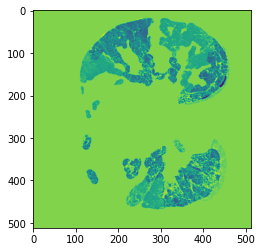

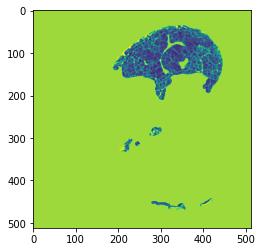

In [22]:
masked = trim_data2[:,:,1] * trim_data[:,:,1]
plt.imshow(masked)
plt.show()
masked2 = trim_data2[:,:,15] * trim_data[:,:,15]
plt.imshow(masked2)
plt.show()

# Wnioski

1. W porównaniu z poprzednią bazą, tutaj mamy informacje dotyczące wieku oraz płci pacjentów.
2. Niestety ilość zebranych informacji raczej nie jest wystarczająca aby można było nauczyć sieć neuronową.
3. Każde zdjęcie ma swoją maskę